## Load libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Load Data

In [3]:
loan_df = pd.read_csv("loan.csv")
loan_df.shape

/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(39717, 111)

In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Data Understanding

In [5]:
print(f"Shape: {loan_df.shape}")

Shape: (39717, 111)


In [6]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
id_cols = ["id", "member_id"]
print(f"ID columns: {id_cols}")

ID columns: ['id', 'member_id']


In [8]:
loan_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [9]:
print("Observed data types:")
loan_df.dtypes.value_counts()

Observed data types:


float64    74
object     24
int64      13
dtype: int64

## Data Cleaning

### Drop id columns

In [10]:
id_cols = ["id", "member_id"]
loan_df.drop(id_cols,axis=1, inplace=True)
loan_df.shape

(39717, 109)

### Drop columns with >40% null values

In [11]:
ms_values = round(loan_df.isnull().sum() / loan_df.shape[0] * 100)
drop_cols = ms_values[ms_values > 40].index

print(f"{len(drop_cols)} columns will be dropped")
print(drop_cols)

loan_df.drop(drop_cols,axis=1, inplace=True)
print(f"Shape:{loan_df.shape}")

57 columns will be dropped
Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_t

### Drop Rows with min 1 null value

In [12]:
drop_rows = loan_df[loan_df.isna().sum(axis=1) > 0].index
print(f"# of rows to be dropped: {len(drop_rows)}")

# of rows to be dropped: 15311


In [13]:
loan_df = loan_df[loan_df.isna().sum(axis=1) == 0]
loan_df.shape

(24406, 52)

## Data Manipulation

In [14]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [15]:
# We notice that there are some customer behaviour variables which means the features which get a value assigned after a loan is approved or when the status is current.
# For our use case such variable cannot determine whether to give loan or not, so we can drop those

loan_df.drop(["pub_rec_bankruptcies", "pub_rec","last_credit_pull_d","out_prncp_inv","total_pymnt_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt" , "chargeoff_within_12_mths"], axis = 1, inplace = True)
loan_df.shape


(24406, 35)

In [16]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths',
       'open_acc', 'revol_util', 'total_acc', 'initial_list_status',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [17]:
cat_cols = loan_df.dtypes[loan_df.dtypes == "object"].index
continuous_cols = loan_df.dtypes[loan_df.dtypes != "object"].index

print(f"Observations:")
print(f"# of Category columns: {len(cat_cols)}")
print(f"# of Continuous columns: {len(continuous_cols)}")

Observations:
# of Category columns: 21
# of Continuous columns: 14


### Category Columns

In [18]:
cat_cols

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'application_type'],
      dtype='object')

#### Using value_counts(), find & drop the columns that have only one unique value

In [19]:
loan_df.pymnt_plan.value_counts()

n    24406
Name: pymnt_plan, dtype: int64

In [20]:
loan_df.initial_list_status.value_counts()

f    24406
Name: initial_list_status, dtype: int64

In [21]:
loan_df.application_type.value_counts()

INDIVIDUAL    24406
Name: application_type, dtype: int64

In [22]:
drop_cols = ["pymnt_plan","initial_list_status","application_type"]
loan_df.drop(drop_cols,axis=1, inplace=True)

In [23]:
#removing url because it has different value for each row based on the id and wont help in analysis
loan_df.url.value_counts()

https://lendingclub.com/browse/loanDetail.action?loan_id=1077430    1
https://lendingclub.com/browse/loanDetail.action?loan_id=525045     1
https://lendingclub.com/browse/loanDetail.action?loan_id=524868     1
https://lendingclub.com/browse/loanDetail.action?loan_id=524771     1
https://lendingclub.com/browse/loanDetail.action?loan_id=524899     1
                                                                   ..
https://lendingclub.com/browse/loanDetail.action?loan_id=760045     1
https://lendingclub.com/browse/loanDetail.action?loan_id=758317     1
https://lendingclub.com/browse/loanDetail.action?loan_id=760194     1
https://lendingclub.com/browse/loanDetail.action?loan_id=760215     1
https://lendingclub.com/browse/loanDetail.action?loan_id=132892     1
Name: url, Length: 24406, dtype: int64

In [24]:
loan_df.drop('url',axis=1, inplace=True)

### Filter data

In [25]:
loan_df["int_rate"] = loan_df['int_rate'].apply(lambda x: float(x[:-1]))

In [26]:
loan_df["emp_length"].value_counts()

10+ years    5382
2 years      2939
< 1 year     2797
3 years      2648
1 year       2202
4 years      2162
5 years      2060
6 years      1362
7 years      1129
8 years       918
9 years       807
Name: emp_length, dtype: int64

In [27]:
## Since we dont have the data to differentiate emp_length above 10 years, lets consider them together

loan_df["emp_length"] = loan_df["emp_length"].apply(lambda x: 10 if x == "10+ years" 
                                            else 1 if x == "< 1 year"
                                            else int(x[0]) )

In [28]:
loan_df["revol_util"].value_counts()

0%        564
46.40%     43
0.20%      41
66.70%     41
88%        40
         ... 
0.75%       1
26.33%      1
13.56%      1
46.74%      1
7.28%       1
Name: revol_util, Length: 1049, dtype: int64

In [29]:
## remove % from revol_util
loan_df["revol_util"]= loan_df["revol_util"].apply(lambda x: float(x[:-1]))

In [30]:
loan_df["zip_code"].value_counts()

100xx    349
945xx    337
606xx    325
112xx    308
070xx    304
        ... 
963xx      1
575xx      1
090xx      1
739xx      1
753xx      1
Name: zip_code, Length: 788, dtype: int64

In [31]:
## removing last two digits ('xx') from the zip code as they are already masked
loan_df['zip_code'] = loan_df['zip_code'].apply(lambda x: x[:3])

### Continuous Columns

#### Using value_counts(), find & drop the columns that have only one unique value

In [32]:
drop_cols = [ "delinq_amnt" ,"tax_liens" ,
        "collections_12_mths_ex_med","policy_code" ,"acc_now_delinq"]
loan_df.drop(drop_cols,axis=1, inplace=True)

### Date columns : last_pymnt_d, last_credit_pull_d, issue_d earliest_cr_line

In [33]:
fmt = "%b-%y"
loan_df["issue_d"] = pd.to_datetime(loan_df["issue_d"],format=fmt)

In [34]:
fmt = "%b-%y"
loan_df["earliest_cr_line"] = pd.to_datetime(loan_df["earliest_cr_line"],format=fmt)

### Outlier analysis

In [35]:
## annual_inc seems to have outiers

cat_cols = loan_df.dtypes[loan_df.dtypes == "object"].index
continuous_cols = loan_df.dtypes[(loan_df.dtypes == "int64") | (loan_df.dtypes == "float64")].index
date_cols = loan_df.dtypes[loan_df.dtypes == "datetime64[ns]"].index



In [36]:
continuous_cols

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths',
       'open_acc', 'revol_util', 'total_acc'],
      dtype='object')

loan_amnt


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


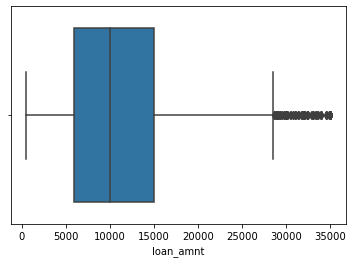

funded_amnt


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


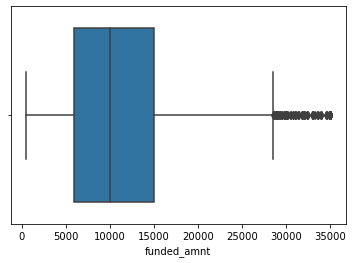

funded_amnt_inv


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


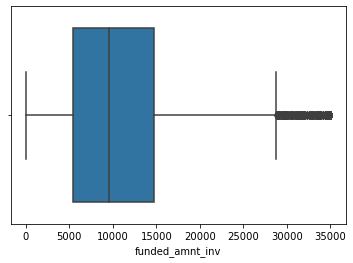

int_rate


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


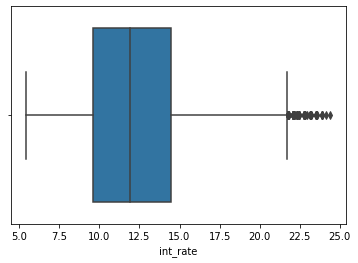

installment


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


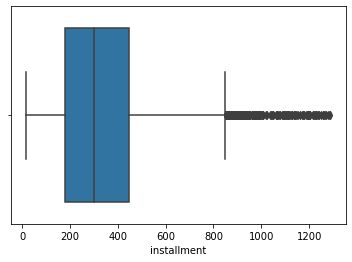

emp_length


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


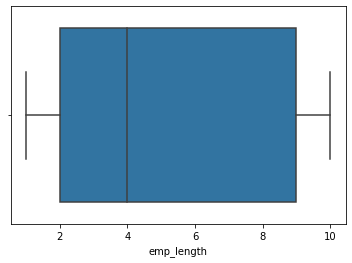

annual_inc


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


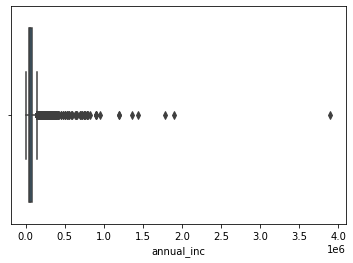

dti


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


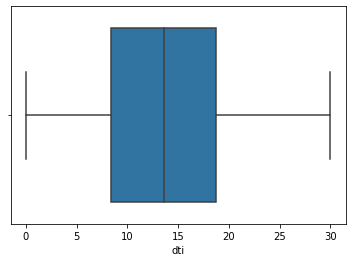

inq_last_6mths


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


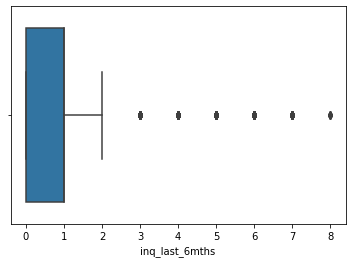

open_acc


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


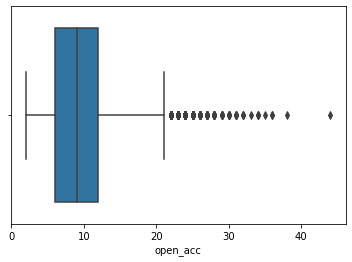

revol_util


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


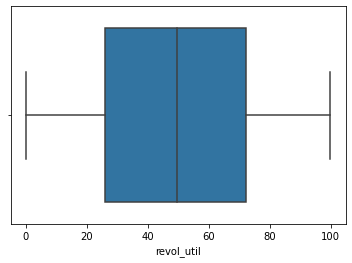

total_acc


/Users/I301903/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


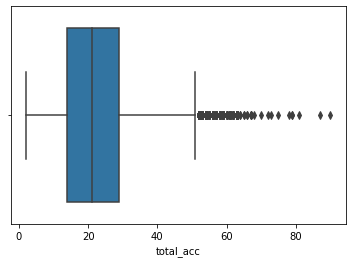

In [37]:
for col in continuous_cols:
  print(col)
  sns.boxplot(loan_df[col])
  plt.show()



#### Calculating percentage of outliers

In [38]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [39]:

for col in continuous_cols:
  lowerbound,upperbound = outlier_treatment(loan_df[col])
  print(col)
  percentage_oulier = (len(loan_df[(loan_df[col] > upperbound) | (loan_df[col] < lowerbound)])/loan_df.shape[0]) * 100
  print(percentage_oulier)


loan_amnt
3.097598951077604
funded_amnt
2.5854298123412276
funded_amnt_inv
2.327296566418094
int_rate
0.5039744325165942
installment
2.482995984593952
emp_length
0.0
annual_inc
4.576743423748258
dti
0.0
inq_last_6mths
9.341965090551502
open_acc
1.241497992296976
revol_util
0.0
total_acc
1.8028353683520446


### Final Dataset after Manipulation

In [40]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24406 entries, 1 to 39623
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            24406 non-null  int64         
 1   funded_amnt          24406 non-null  int64         
 2   funded_amnt_inv      24406 non-null  float64       
 3   term                 24406 non-null  object        
 4   int_rate             24406 non-null  float64       
 5   installment          24406 non-null  float64       
 6   grade                24406 non-null  object        
 7   sub_grade            24406 non-null  object        
 8   emp_title            24406 non-null  object        
 9   emp_length           24406 non-null  int64         
 10  home_ownership       24406 non-null  object        
 11  annual_inc           24406 non-null  float64       
 12  verification_status  24406 non-null  object        
 13  issue_d              24406 non-

In [41]:
print(f"Shape: {loan_df.shape}")

cat_cols = loan_df.dtypes[loan_df.dtypes == "object"].index
continuous_cols = loan_df.dtypes[(loan_df.dtypes == "int64") | (loan_df.dtypes == "float64")].index
date_cols = loan_df.dtypes[loan_df.dtypes == "datetime64[ns]"].index

print(f"# of Category columns: {len(cat_cols)}")
print(f"# of Continuous columns: {len(continuous_cols)}")
print(f"# of Date Columns: {len(date_cols)}")

Shape: (24406, 26)
# of Category columns: 12
# of Continuous columns: 12
# of Date Columns: 2


## Data Analysis

In [42]:
loan_df["loan_status"].value_counts()

Fully Paid     20399
Charged Off     3328
Current          679
Name: loan_status, dtype: int64

In [43]:
# Since we are interested in understanding customers who default, 
# lets filter the records to have only "Fully Paid" or "Charged Off" as their loan_status

#loan_df[loan_df["loan_status"] is in ["Fully Paid", "Charged Off"]]
loan_df = loan_df[(loan_df["loan_status"] == "Fully Paid") | (loan_df['loan_status'] == "Charged Off")]

In [44]:
loan_df["loan_status"].value_counts()

Fully Paid     20399
Charged Off     3328
Name: loan_status, dtype: int64

### Univariate Analysis & Segmented Univariate Analysis : identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).

#### Univariate Analysis

In [45]:
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state'],
      dtype='object')

#### Segmented Univariate Analysis

In [46]:
grouped_by_loan_status = loan_df.groupby(by="loan_status")

In [47]:
grouped_by_loan_status.mean()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_util,total_acc
loan_status,,,,,,,,,,,,
Charged Off,12788.423978,12381.430288,11472.953405,13.927332,353.269195,5.208233,63528.798723,14.191547,1.063702,9.474760,55.601487,22.016526
Fully Paid,11243.241090,10962.030001,10440.518991,11.692243,331.030237,4.940389,70032.077630,13.305682,0.850336,9.383303,47.789902,22.354282


In [48]:
temp_df = grouped_by_loan_status.median()
temp_df

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_util,total_acc
loan_status,,,,,,,,,,,,
Charged Off,11200.0,10800.0,10000.000000,13.67,315.49,5.0,54600.0,14.54,1.0,9.0,58.2,20.0
Fully Paid,10000.0,10000.0,9113.068391,11.49,291.76,4.0,60000.0,13.41,1.0,9.0,47.8,21.0


In [49]:
def get_diff_percentages(df):
    df1 = df.iloc[0,:]
    df2 = df.iloc[1,:]

    return round(100 * np.abs((df2 - df1) / df2),0)

In [50]:
diff_perc = get_diff_percentages(temp_df)
sig_diff_perc = diff_perc[diff_perc > 10]
temp_df[sig_diff_perc.index]

,loan_amnt,int_rate,emp_length,revol_util
loan_status,,,,
Charged Off,11200.0,13.67,5.0,58.2
Fully Paid,10000.0,11.49,4.0,47.8


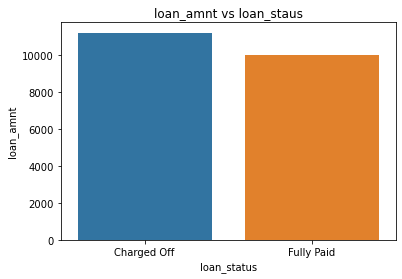

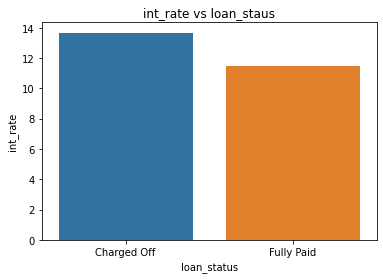

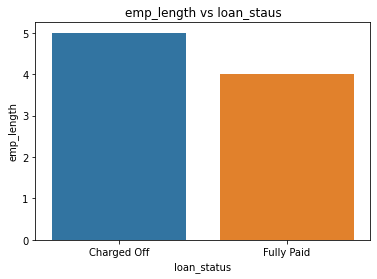

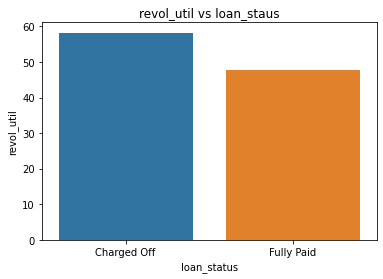

In [51]:
data = temp_df[sig_diff_perc.index]
for col in data.columns:
    print()
    sns.barplot(x=data.index, y=data[col]).set(title= col + " vs loan_staus")
    plt.show()

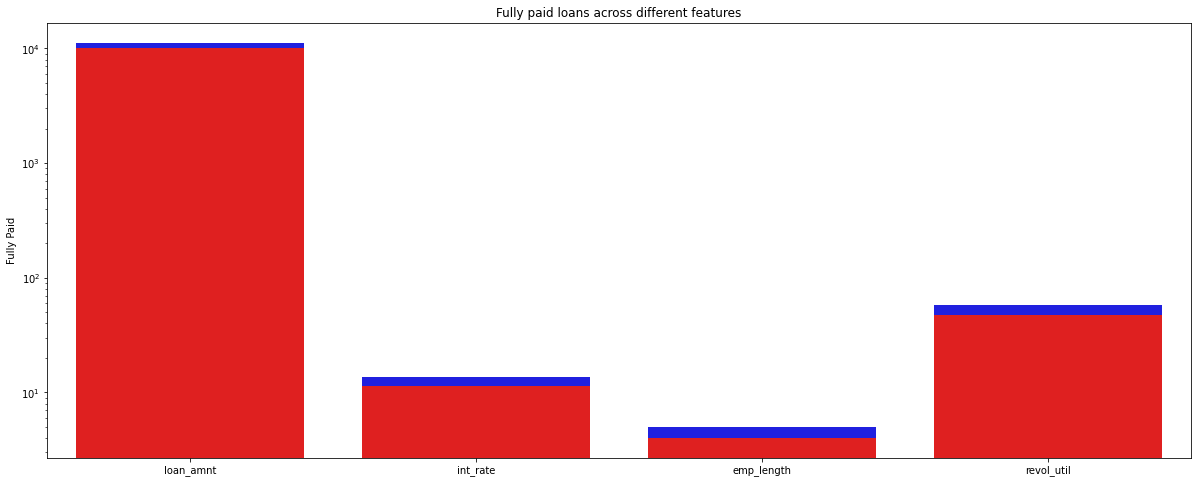

In [52]:
data = temp_df[sig_diff_perc.index].T

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.barplot(x=data.index, y=data["Charged Off"], color="b").set(title='Fully paid loans across different features')
ax = sns.barplot(x=data.index, y=data["Fully Paid"], color="r")
ax.set_yscale("log")
plt.show()

In [53]:
## find columns with difference greater than 10%
temp_df_c = temp_df.iloc[0,:]
temp_df_f = temp_df.iloc[1,:]

100 * np.abs((temp_df_f - temp_df_c) / temp_df_f)

loan_amnt          12.000000
funded_amnt         8.000000
funded_amnt_inv     9.732524
int_rate           18.973020
installment         8.133397
emp_length         25.000000
annual_inc          9.000000
dti                 8.426547
inq_last_6mths      0.000000
open_acc            0.000000
revol_util         21.757322
total_acc           4.761905
dtype: float64

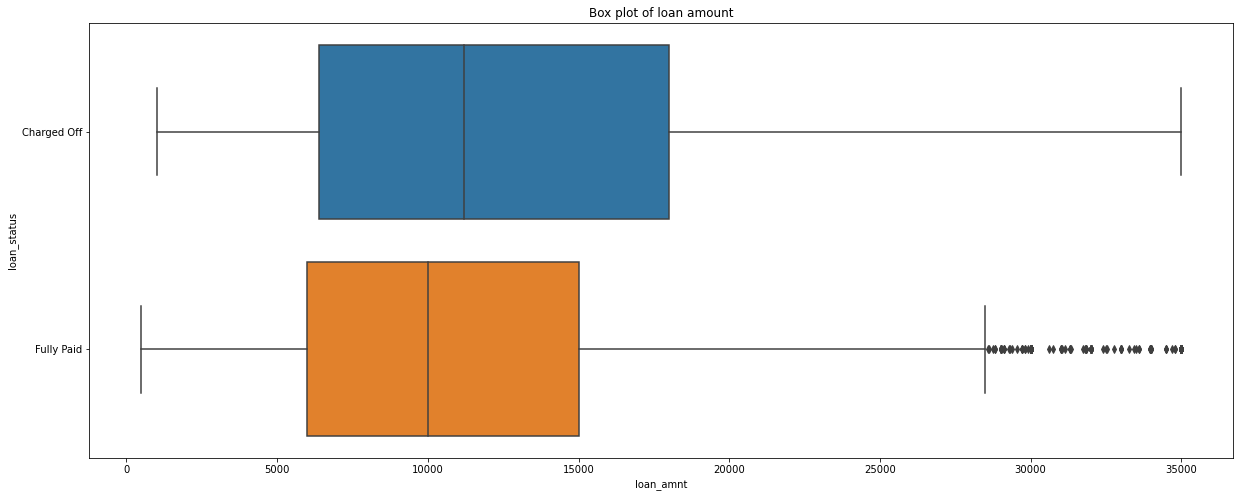

In [54]:
col = "loan_amnt" 
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue]).set(title='Box plot of loan amount')
plt.show()

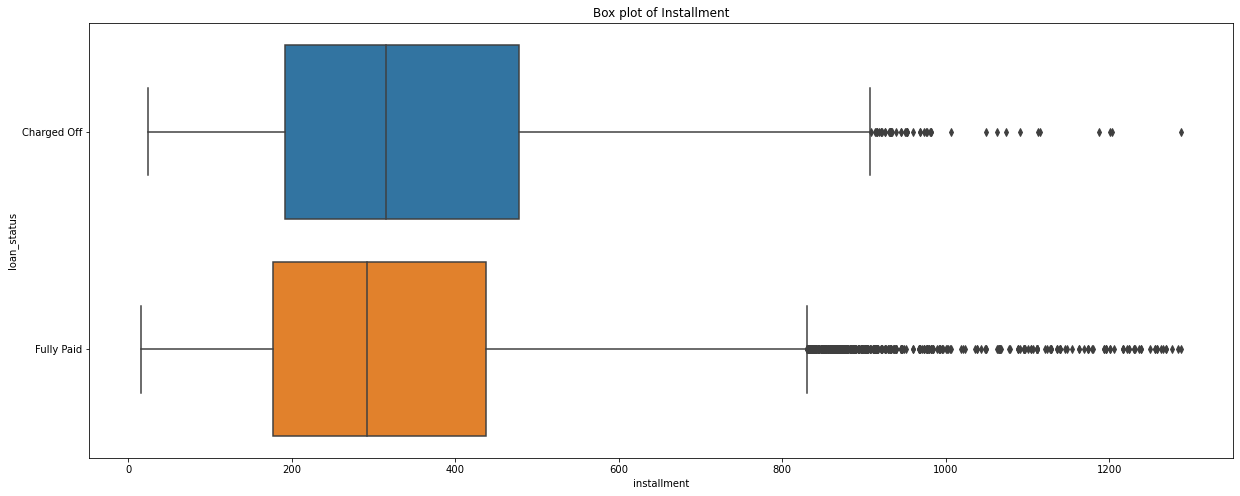

In [55]:
col = "installment"
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue]).set(title='Box plot of Installment')
plt.show()

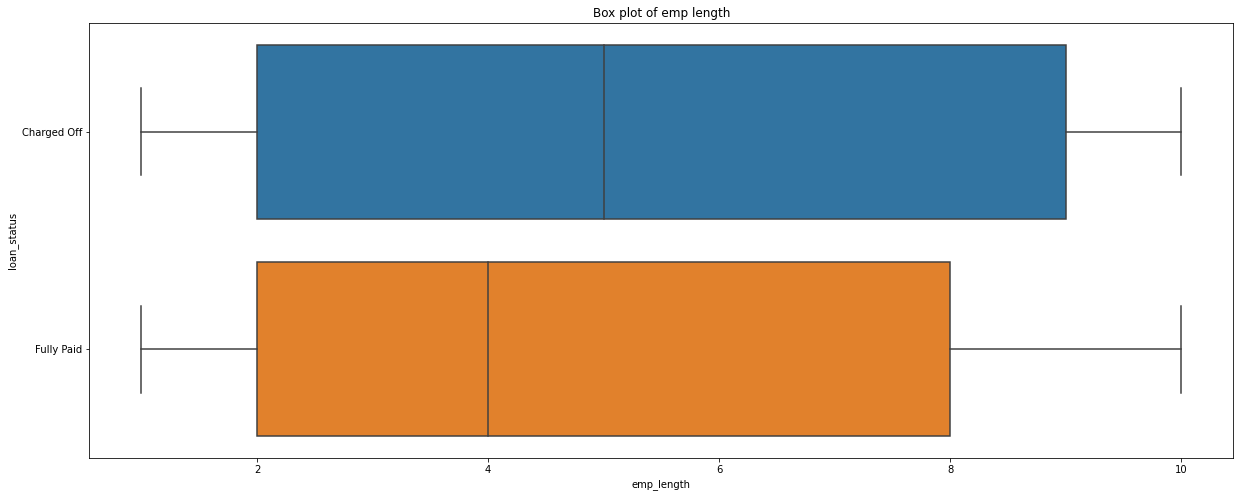

In [56]:
col = "emp_length" 
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue]).set(title='Box plot of emp length')
plt.show()

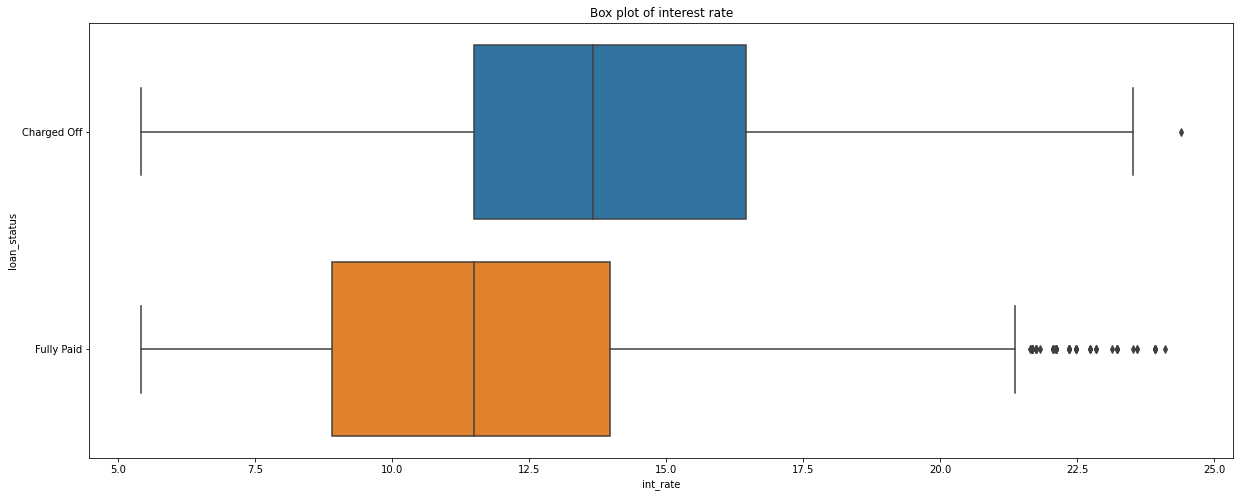

In [57]:
# high int_rate has a significant difference

col = "int_rate" 
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue]).set(title='Box plot of interest rate')
plt.show()

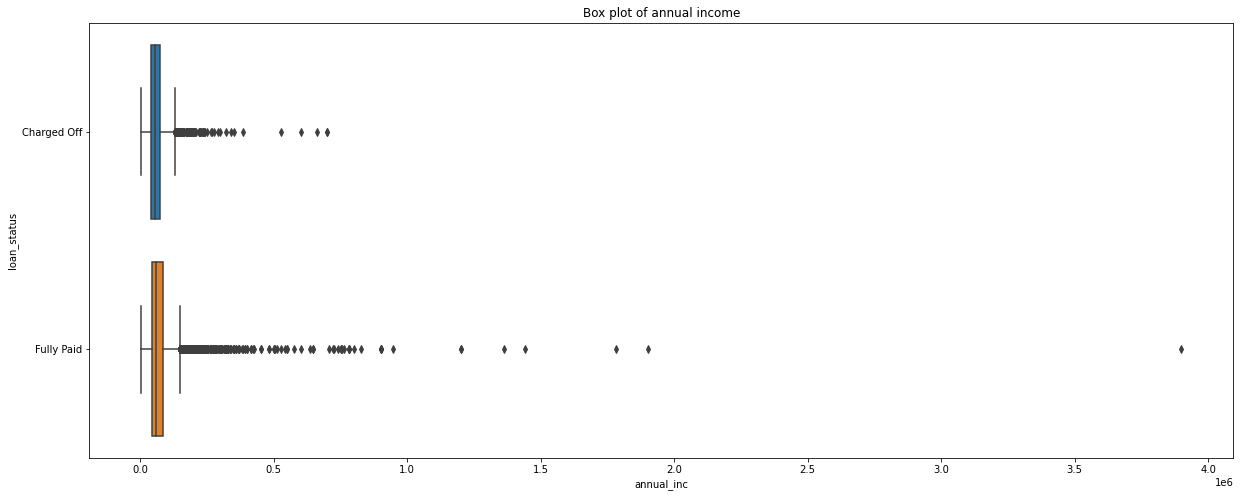

In [58]:
col = "annual_inc" 
hue = "loan_status"

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.boxplot(x=loan_df[col], y=loan_df[hue]).set(title='Box plot of annual income')
plt.show()

In [59]:
grouped_by_loan_status = loan_df.groupby(by="loan_status").count()

##### Observation:
Significant differences found in "int_rate", "annual_inc", "loan_amnt", "revol_util", "total_rec_late_fee"

In [60]:
# purpose has signigicant difference
## better results if we drop loan_status current
pd.crosstab(loan_df["purpose"], [loan_df["loan_status"]], normalize="index")

loan_status,Charged Off,Fully Paid
purpose,,
car,0.092060,0.907940
credit_card,0.104906,0.895094
debt_consolidation,0.147881,0.852119
educational,0.166667,0.833333
home_improvement,0.114735,0.885265
house,0.153846,0.846154
major_purchase,0.096651,0.903349
medical,0.167095,0.832905
moving,0.129870,0.870130


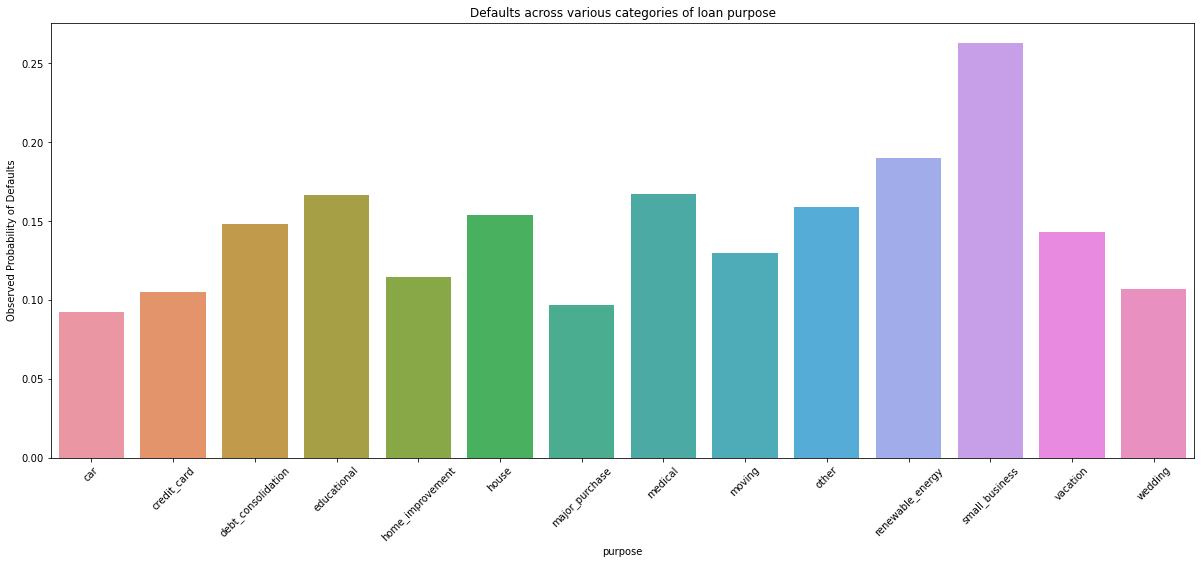

In [114]:
purp_df = pd.crosstab(loan_df["purpose"], [loan_df["loan_status"]], normalize="index")
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.barplot(data=purp_df, x=purp_df.index, y='Charged Off').set(title='Defaults across various categories of loan purpose')
plt.ylabel("Observed Probability of Defaults")
plt.xticks(rotation=45)
plt.show()

In [62]:
purp_df = pd.crosstab(loan_df["zip_code"], [loan_df["loan_status"]])

In [63]:
purp_df['Percentage default'] = purp_df['Charged Off']/(purp_df['Charged Off'] + purp_df['Fully Paid'])

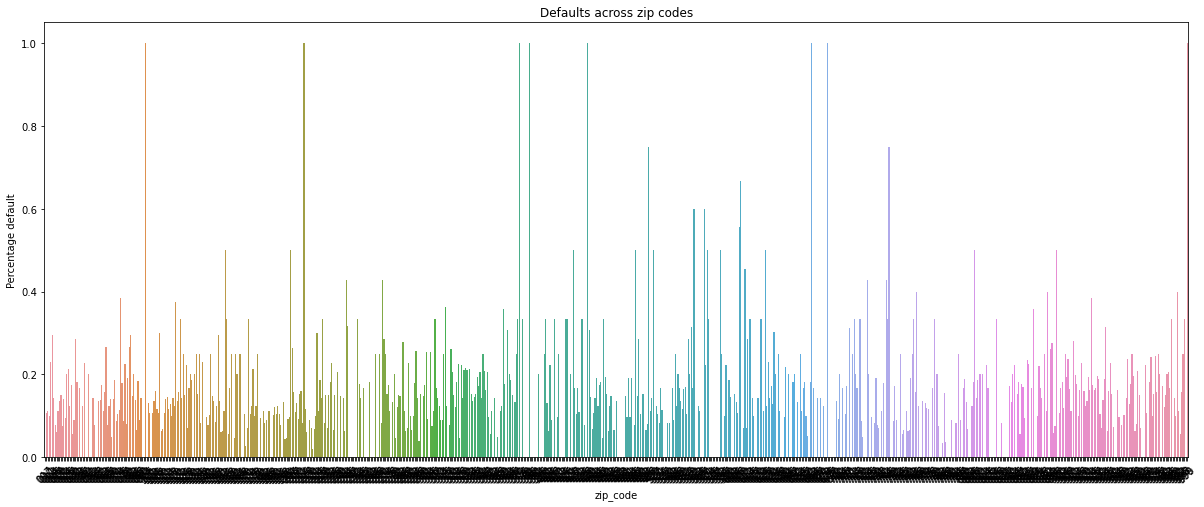

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.barplot(data=purp_df, x=purp_df.index, y='Percentage default').set(title='Defaults across zip codes')
plt.xticks(rotation=45)
plt.show()

In [65]:
## we see that there are zip codes which has 100% default rate. this may be beacuse there are only one or 2 loans taken in that region
purp_df[purp_df['Percentage default'] == 1]

loan_status,Charged Off,Fully Paid,Percentage default
zip_code,,,
094,2,0,1.0
215,2,0,1.0
373,1,0,1.0
385,1,0,1.0
438,1,0,1.0
663,1,0,1.0
675,1,0,1.0
999,1,0,1.0


In [66]:
## to solve the above problem, we will find total number of loans in each area and then will only consider percentages where the amount of loans in above a threshold
purp_df['total'] = (purp_df['Charged Off'] + purp_df['Fully Paid'])

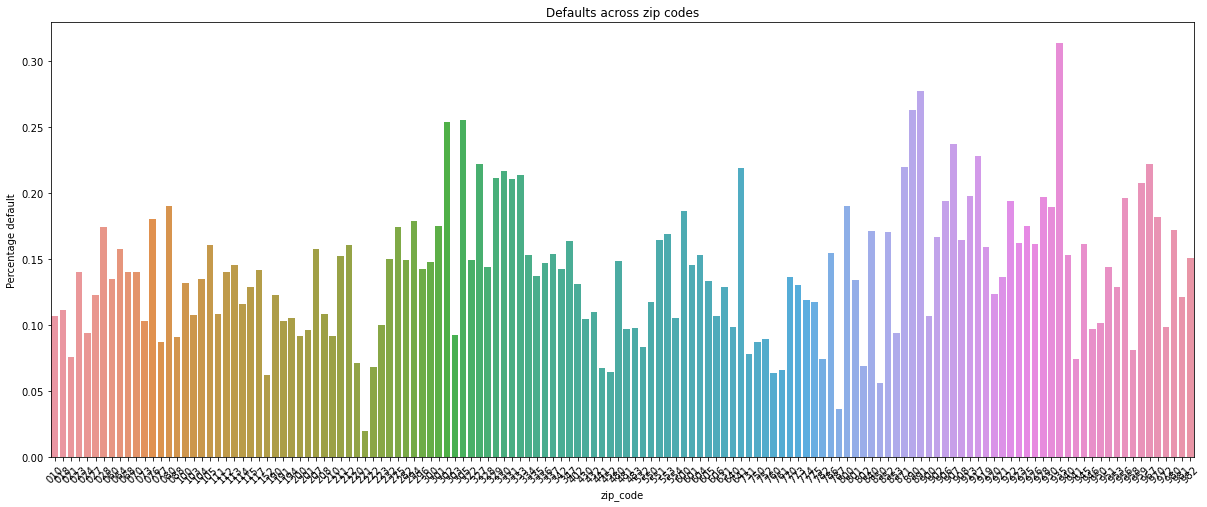

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.barplot(data=purp_df[purp_df['total'] >= 50], x=purp_df[purp_df['total'] >= 50].index, y='Percentage default').set(title='Defaults across zip codes')
plt.xticks(rotation=45)
plt.show()

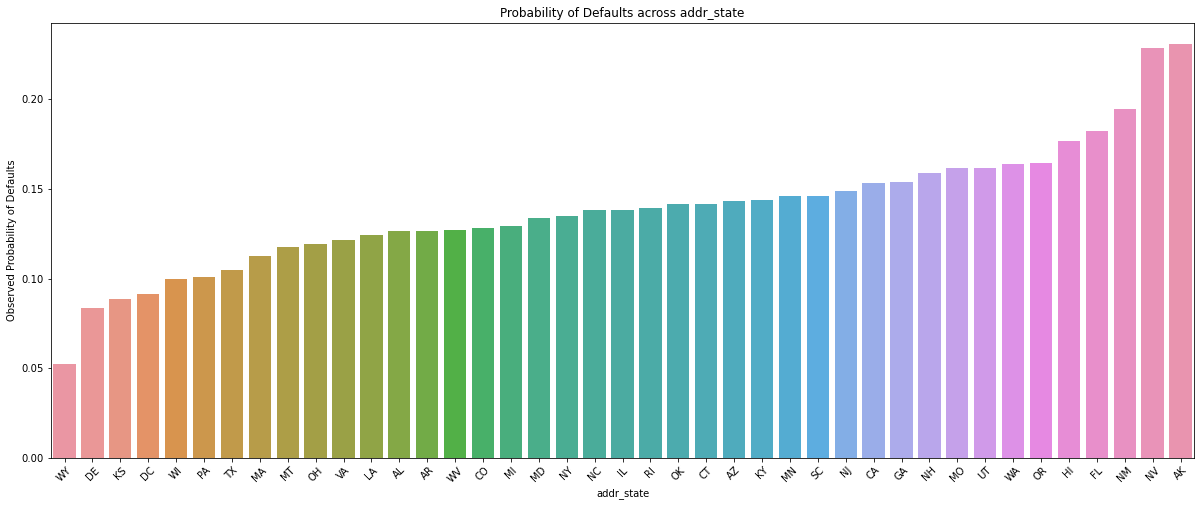

In [121]:
purp_df = pd.crosstab(loan_df["addr_state"], [loan_df["loan_status"]])
purp_df['total'] = (purp_df['Charged Off'] + purp_df['Fully Paid'])
purp_df['Percentage default'] = purp_df['Charged Off']/(purp_df['Charged Off'] + purp_df['Fully Paid'])
purp_df = purp_df.sort_values('Percentage default')
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.barplot(data=purp_df[purp_df['total'] >= 50], x=purp_df[purp_df['total'] >= 50].index, y='Percentage default')
plt.xticks(rotation=45)
plt.ylabel("Observed Probability of Defaults")
plt.title("Probability of Defaults across addr_state")
plt.show()

In [69]:
pd.crosstab(loan_df["loan_status"], [loan_df["home_ownership"]], normalize="columns")

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
Charged Off,0.134781,0.191489,0.139271,0.144968
Fully Paid,0.865219,0.808511,0.860729,0.855032


In [70]:
# Significant finding
pd.crosstab(loan_df["loan_status"], [loan_df["grade"]], normalize="columns")

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,0.054251,0.116943,0.162024,0.213877,0.263971,0.317512,0.325967
Fully Paid,0.945749,0.883057,0.837976,0.786123,0.736029,0.682488,0.674033


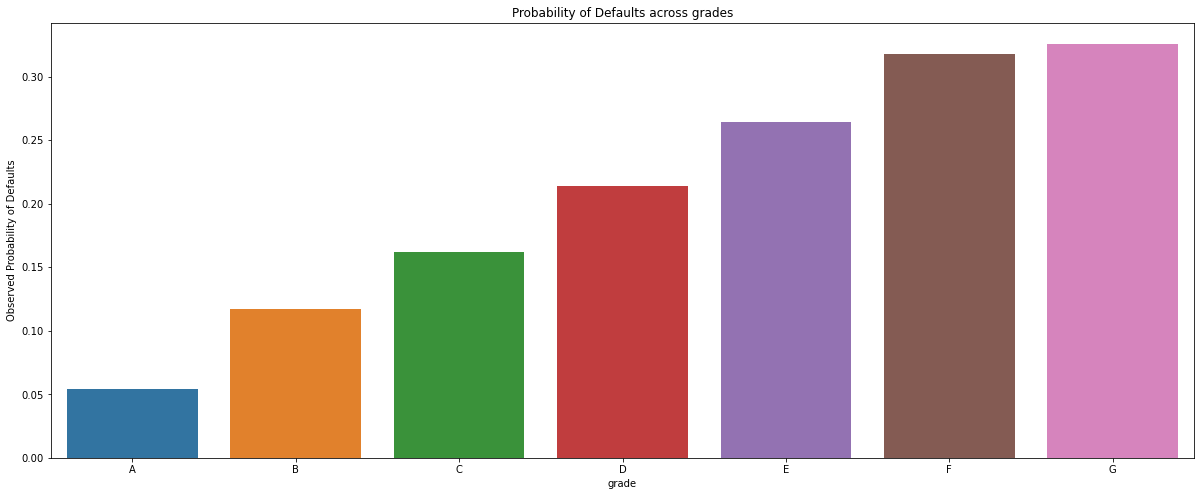

In [118]:
grad_df = pd.crosstab(loan_df["grade"], [loan_df["loan_status"]], normalize="index")
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.barplot(data=grad_df, x=grad_df.index, y='Charged Off')
plt.ylabel("Observed Probability of Defaults")
plt.title("Probability of Defaults across grades")
plt.show()

In [72]:
#Significant
pd.crosstab(loan_df["sub_grade"], [loan_df["loan_status"]], normalize="index")


loan_status,Charged Off,Fully Paid
sub_grade,,
A1,0.026801,0.973199
A2,0.049826,0.950174
A3,0.046642,0.953358
A4,0.053102,0.946898
A5,0.071884,0.928116
B1,0.086548,0.913452
B2,0.103766,0.896234
B3,0.117442,0.882558
B4,0.128238,0.871762


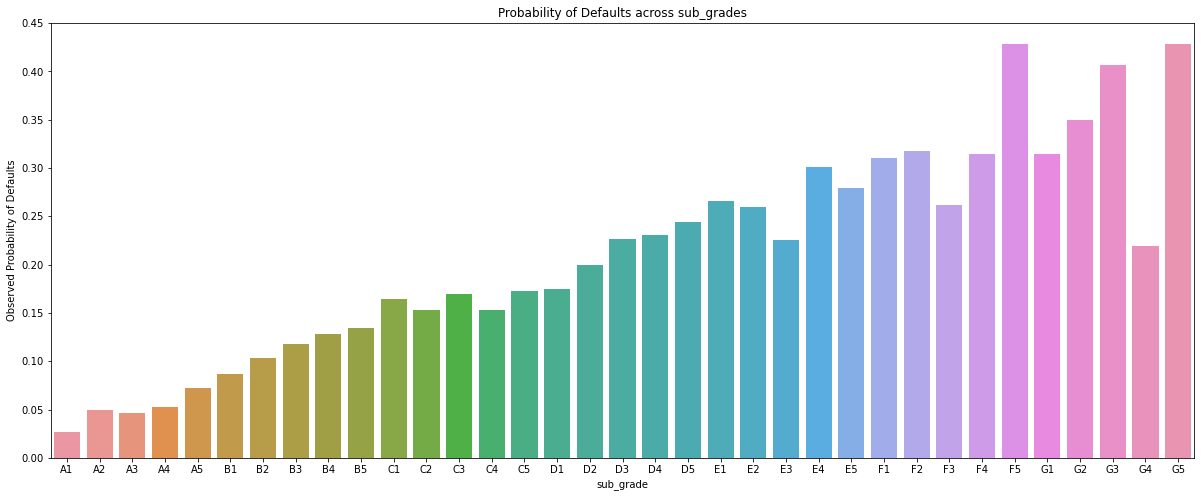

In [120]:
subgrad_df = pd.crosstab(loan_df["sub_grade"], [loan_df["loan_status"]], normalize="index")
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.barplot(data=subgrad_df, x=subgrad_df.index, y='Charged Off')
plt.ylabel("Observed Probability of Defaults")
plt.title("Probability of Defaults across sub_grades")
plt.show()

In [74]:
#Significant
pd.crosstab(loan_df["addr_state"], [loan_df["loan_status"]], normalize="index")

loan_status,Charged Off,Fully Paid
addr_state,,
AK,0.230769,0.769231
AL,0.126437,0.873563
AR,0.126667,0.873333
AZ,0.143411,0.856589
CA,0.153090,0.846910
CO,0.128151,0.871849
CT,0.141509,0.858491
DC,0.091603,0.908397
DE,0.083333,0.916667


In [75]:
# Significant
pd.crosstab(loan_df["zip_code"], [loan_df["loan_status"]], normalize="index")

loan_status,Charged Off,Fully Paid
zip_code,,
007,0.000000,1.000000
010,0.107143,0.892857
011,0.111111,0.888889
012,0.100000,0.900000
013,0.230769,0.769231
...,...,...
995,0.157895,0.842105
996,0.250000,0.750000
997,0.333333,0.666667


In [76]:
tab = pd.crosstab(loan_df["zip_code"], [loan_df["loan_status"]], normalize="index")
tab[tab["Charged Off"] > 0.2].shape

(160, 2)

### Derived Metrics: 

#### Business-driven

In [77]:
loan_df["emi_burden"] = round(loan_df["annual_inc"] / loan_df["installment"])

In [78]:
loan_df.groupby(by="loan_status")["emi_burden"].mean()

loan_status
Charged Off    239.176983
Fully Paid     290.875386
Name: emi_burden, dtype: float64

In [79]:
loan_df.groupby(by="loan_status")["emi_burden"].median()
# significant obv

loan_status
Charged Off    173.0
Fully Paid     205.0
Name: emi_burden, dtype: float64

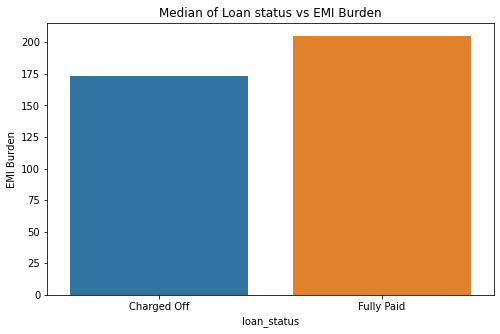

In [122]:
df =loan_df.groupby(by="loan_status")["emi_burden"].median()
df.values

fig, ax = plt.subplots()
fig.set_size_inches(8, 5, forward=True)
ax = sns.barplot(x=df.index, y=df.values).set(title='Median of Loan status vs EMI Burden')
plt.ylabel("EMI Burden")
plt.show()

In [81]:
loan_df["inc_loan_ratio"] = round(loan_df["annual_inc"] / loan_df["loan_amnt"] )

In [82]:
loan_df.groupby("loan_status")["inc_loan_ratio"].mean()

loan_status
Charged Off    6.885216
Fully Paid     8.763077
Name: inc_loan_ratio, dtype: float64

In [83]:
loan_df.groupby("loan_status")["inc_loan_ratio"].median()

loan_status
Charged Off    5.0
Fully Paid     6.0
Name: inc_loan_ratio, dtype: float64

#### Type_driven

##### Date columns exist However, extraction of Date features might not lead to meaningful analysis of defaulting, hence not using the same

### Bi-variate Analysis

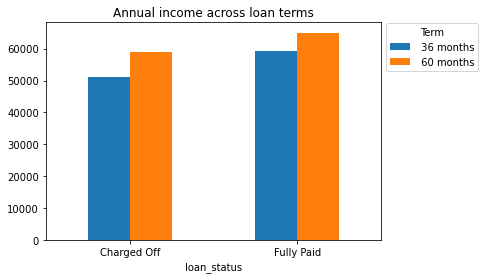

In [84]:
pd.crosstab(loan_df["loan_status"], loan_df["term"], values=loan_df['annual_inc'], aggfunc=np.median).plot(kind='bar', rot =0, title='Annual income across loan terms').legend(title='Term', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

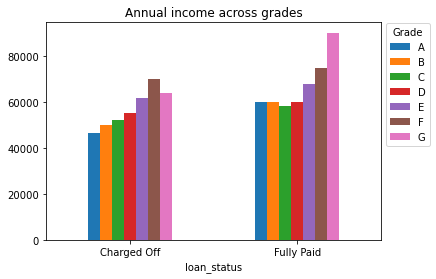

In [85]:
pd.crosstab(loan_df["loan_status"], loan_df["grade"], values=loan_df['annual_inc'], aggfunc=np.median).plot(kind='bar', rot =0, title='Annual income across grades').legend(title='Grade', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

In [86]:
#grade G defaulters have lesser income

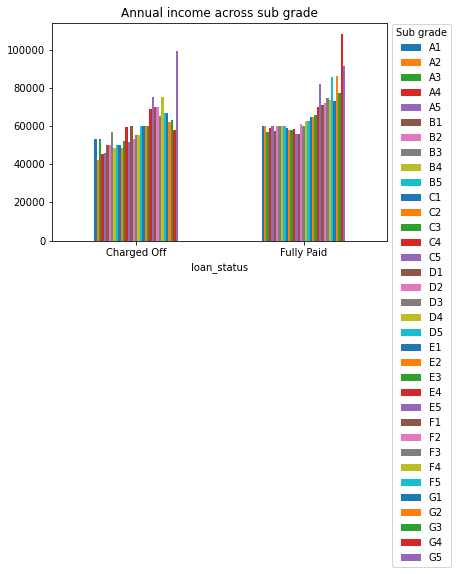

In [87]:
pd.crosstab(loan_df["loan_status"], loan_df["sub_grade"], values=loan_df['annual_inc'], aggfunc=np.median).plot(kind='bar', rot =0, title='Annual income across sub grade').legend(title='Sub grade', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

In [88]:
#G2, G3, G4 shows significant difference in income

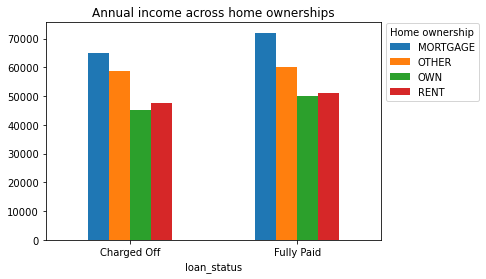

In [89]:
pd.crosstab(loan_df["loan_status"], loan_df["home_ownership"], values=loan_df['annual_inc'], aggfunc=np.median).plot(kind='bar', rot =0, title='Annual income across home ownerships').legend(title='Home ownership', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

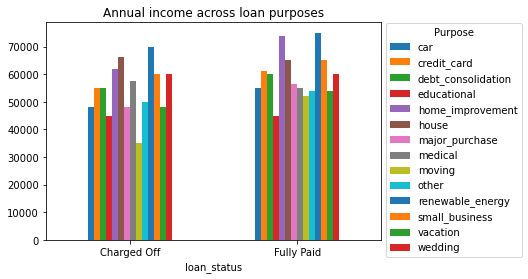

In [90]:
pd.crosstab(loan_df["loan_status"], loan_df["purpose"], values=loan_df['annual_inc'], aggfunc=np.median).plot(kind='bar', rot =0, title='Median of Annual income across purposes').legend(title='Purpose', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

In [91]:
#we saw that small business is one of the major drivers and so is the annual income. Interestingly, here the annual income in both categories is same indicating that it is not the only driver

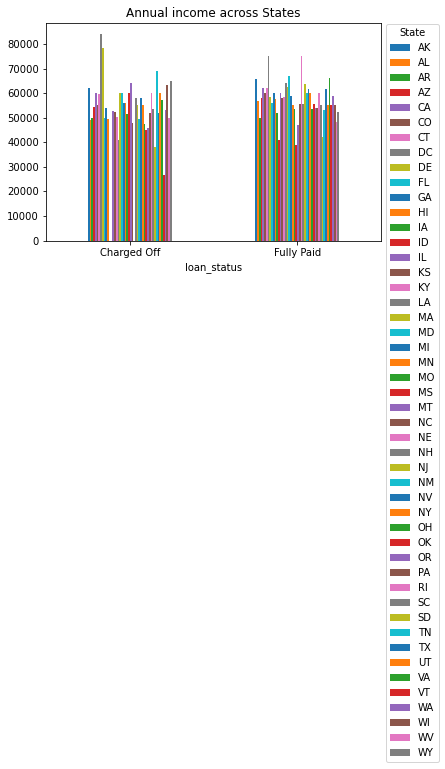

In [92]:
pd.crosstab(loan_df["loan_status"], loan_df["addr_state"], values=loan_df['annual_inc'], aggfunc=np.median).plot(kind='bar', rot =0, title='Annual income across States').legend(title='State', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

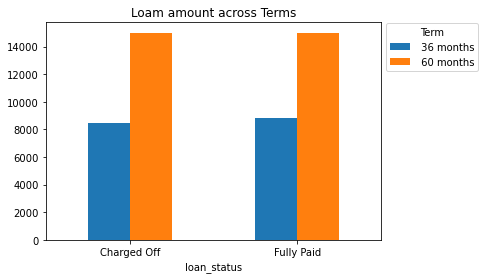

In [93]:
pd.crosstab(loan_df["loan_status"], loan_df["term"], values=loan_df['loan_amnt'], aggfunc=np.median).plot(kind='bar', rot =0, title='Loam amount across Terms').legend(title='Term', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

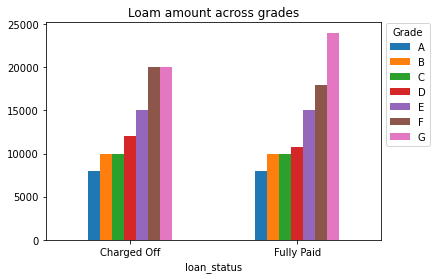

In [94]:
pd.crosstab(loan_df["loan_status"], loan_df["grade"], values=loan_df['loan_amnt'], aggfunc=np.median).plot(kind='bar', rot =0, title='Loam amount across grades').legend(title='Grade', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

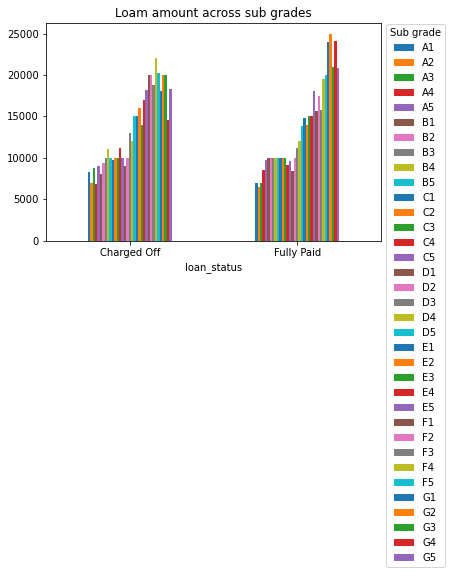

In [95]:
pd.crosstab(loan_df["loan_status"], loan_df["sub_grade"], values=loan_df['loan_amnt'], aggfunc=np.median).plot(kind='bar', rot =0, title='Loam amount across sub grades').legend(title='Sub grade', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

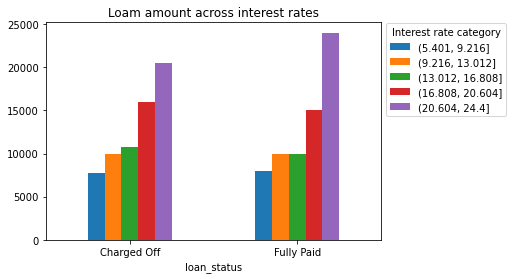

In [96]:
pd.crosstab(loan_df["loan_status"], pd.cut(loan_df["int_rate"], bins=5), values=loan_df['loan_amnt'], aggfunc=np.median).plot(kind='bar', rot =0, title='Loam amount across interest rates').legend(title='Interest rate category', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

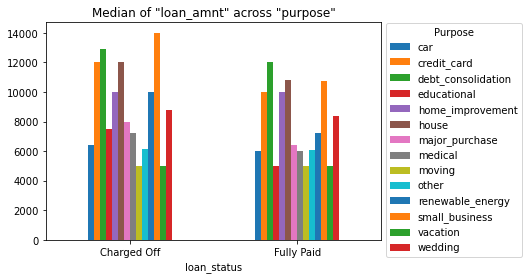

In [125]:
pd.crosstab(loan_df["loan_status"], loan_df["purpose"], values=loan_df['loan_amnt'], aggfunc=np.median).plot(kind='bar', rot =0, title='Median of "loan_amnt" across "purpose"').legend(title='Purpose', bbox_to_anchor=(1, 1.02),
         loc='upper left')
plt.show()

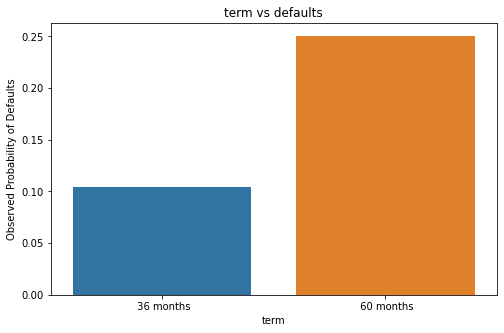

In [112]:
term_df = pd.crosstab(loan_df["term"], [loan_df["loan_status"]], normalize="index")

fig, ax = plt.subplots()
fig.set_size_inches(8, 5, forward=True)
ax = sns.barplot(x=term_df.index, y=term_df["Charged Off"]).set(title='term vs defaults')
plt.ylabel("Observed Probability of Defaults")
plt.show()

In [99]:
loan_df.groupby(by=["loan_status", "term"])["int_rate"].mean()

loan_status  term      
Charged Off   36 months    12.491450
              60 months    15.735587
Fully Paid    36 months    10.941388
              60 months    14.414558
Name: int_rate, dtype: float64

In [100]:
loan_df.groupby(by=["loan_status", "grade"])["loan_amnt"].mean()

loan_status  grade
Charged Off  A         8413.033537
             B        11614.791667
             C        11592.477876
             D        12856.956845
             E        16401.407658
             F        19839.175258
             G        18702.118644
Fully Paid   A         8891.434942
             B        11405.017342
             C        11146.528966
             D        12397.722672
             E        15960.823910
             F        17985.011990
             G        22012.704918
Name: loan_amnt, dtype: float64

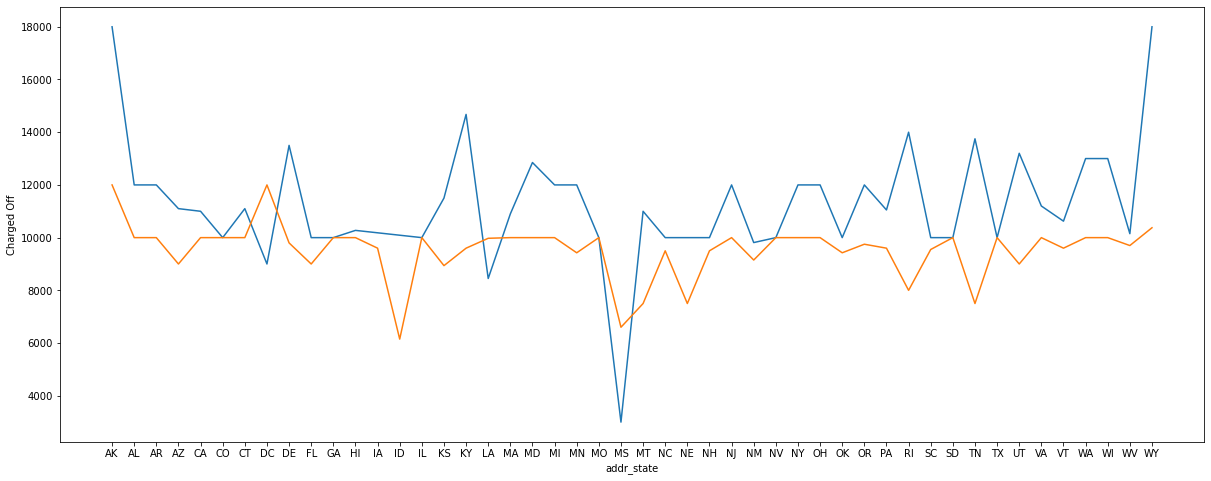

In [101]:
## Insight Region wise acceptable loan_amnt for not defaulting
df = loan_df.groupby(by=["loan_status", "addr_state"], as_index=False)["loan_amnt"].median()

temp_df = df.pivot(index="addr_state" , columns="loan_status")
temp_df.columns = ["Charged Off", "Fully Paid"]

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.lineplot(x=temp_df.index, y=temp_df["Charged Off"])
ax = sns.lineplot(x=temp_df.index, y=temp_df["Fully Paid"])
plt.show()

In [102]:
## Insight Region wise acceptable loan_amnt for not defaulting
df = loan_df.groupby(by=["loan_status", "addr_state"], as_index=False)["loan_amnt"].median()

temp_df = df.pivot(index="addr_state" , columns="loan_status")
temp_df.columns = ["Charged Off", "Fully Paid"]
temp_df

,Charged Off,Fully Paid
addr_state,,
AK,18000.0,12000.0
AL,12000.0,10000.0
AR,12000.0,10000.0
AZ,11100.0,9000.0
CA,11000.0,10000.0
CO,10000.0,10000.0
CT,11100.0,10000.0
DC,9000.0,12000.0
DE,13500.0,9800.0


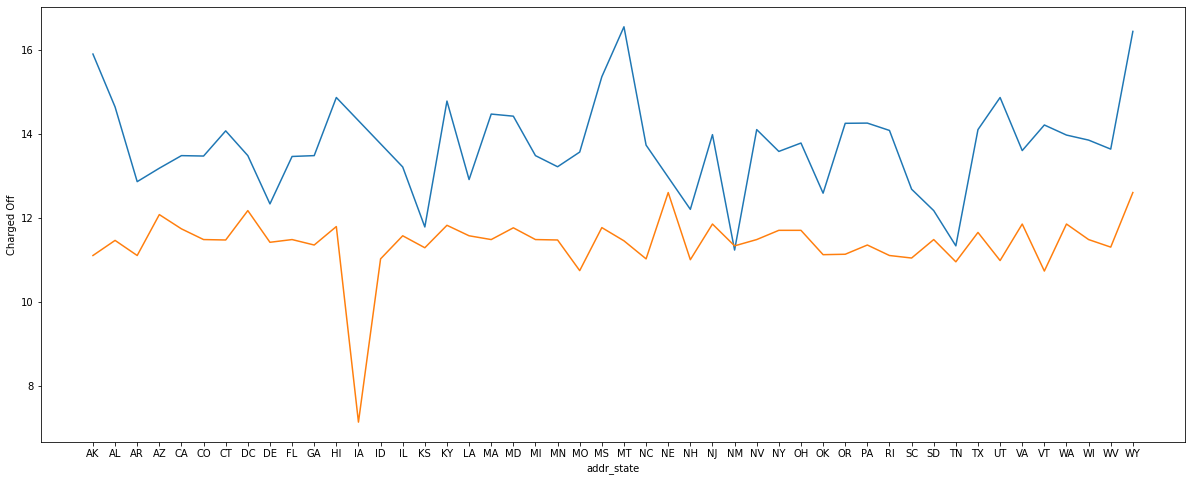

In [103]:
## Insight Region wise acceptable int_rate for not defaulting
df = loan_df.groupby(by=["loan_status", "addr_state"], as_index=False)["int_rate"].median()

temp_df = df.pivot(index="addr_state" , columns="loan_status")
temp_df.columns = ["Charged Off", "Fully Paid"]

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.lineplot(x=temp_df.index, y=temp_df["Charged Off"])
ax = sns.lineplot(x=temp_df.index, y=temp_df["Fully Paid"])
plt.show()

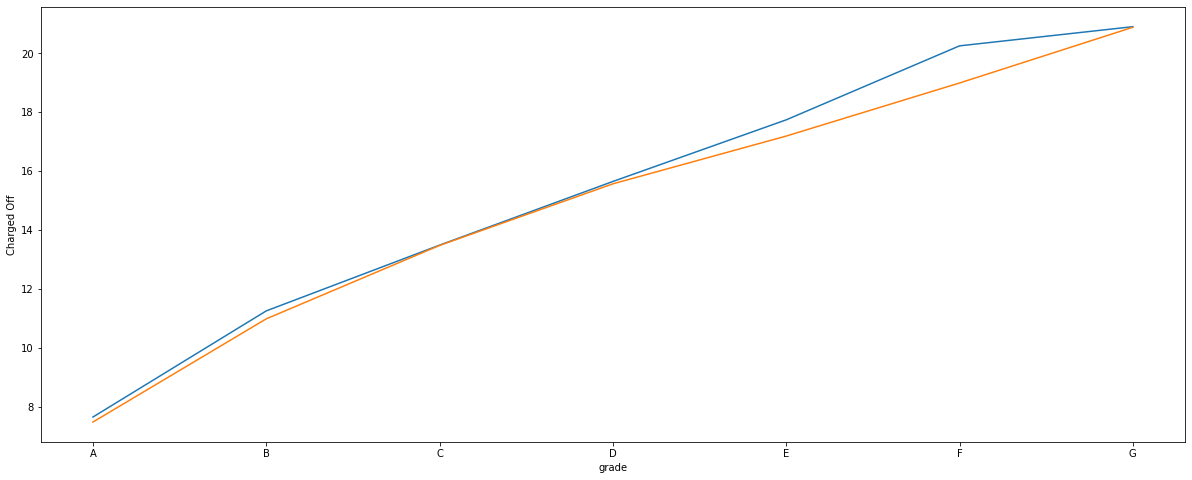

In [104]:
## Insight Region wise acceptable int_rate for not defaulting
df = loan_df.groupby(by=["loan_status", "grade"], as_index=False)["int_rate"].median()

temp_df = df.pivot(index="grade" , columns="loan_status")
temp_df.columns = ["Charged Off", "Fully Paid"]

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.lineplot(x=temp_df.index, y=temp_df["Charged Off"])
ax = sns.lineplot(x=temp_df.index, y=temp_df["Fully Paid"])
plt.show()

In [105]:
temp_df

,Charged Off,Fully Paid
grade,,
A,7.66,7.49
B,11.26,10.99
C,13.49,13.48
D,15.65,15.57
E,17.74,17.19
F,20.25,18.99
G,20.90,20.88


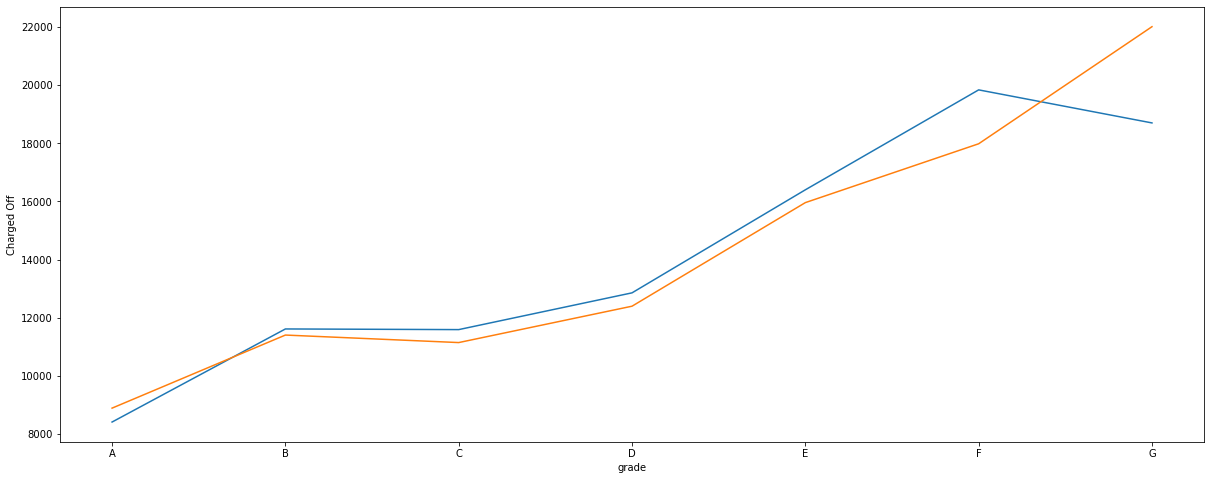

In [106]:
## Insight Region wise acceptable int_rate for not defaulting
df = loan_df.groupby(by=["loan_status", "grade"], as_index=False)["loan_amnt"].mean()

temp_df = df.pivot(index="grade" , columns="loan_status")
temp_df.columns = ["Charged Off",  "Fully Paid"]

fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.lineplot(x=temp_df.index, y=temp_df["Charged Off"])
ax = sns.lineplot(x=temp_df.index, y=temp_df["Fully Paid"])
plt.show()

In [107]:
temp_df

,Charged Off,Fully Paid
grade,,
A,8413.033537,8891.434942
B,11614.791667,11405.017342
C,11592.477876,11146.528966
D,12856.956845,12397.722672
E,16401.407658,15960.823910
F,19839.175258,17985.011990
G,18702.118644,22012.704918


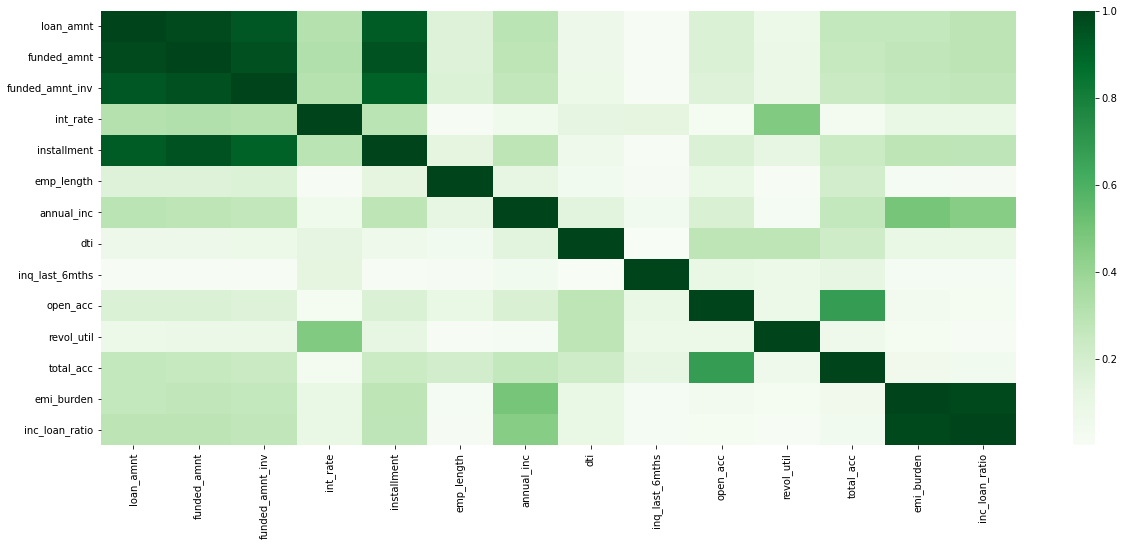

In [127]:
curr = loan_df.corr().abs()
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.heatmap(curr, cmap="Greens")
plt.show()

# no meaningful insights apart from obvious ones

# Rough

In [109]:
pd.crosstab(loan_df["purpose"], [loan_df["loan_status"]], normalize="index").reset_index()

loan_status,purpose,Charged Off,Fully Paid
0,car,0.092060,0.907940
1,credit_card,0.104906,0.895094
2,debt_consolidation,0.147881,0.852119
3,educational,0.166667,0.833333
4,home_improvement,0.114735,0.885265
5,house,0.153846,0.846154
6,major_purchase,0.096651,0.903349
7,medical,0.167095,0.832905
8,moving,0.129870,0.870130
9,other,0.158791,0.841209


In [110]:
purp_df = pd.melt(df, id_vars="purpose", value_name="Percentage")
purp_df.head()

KeyError: 'purpose'

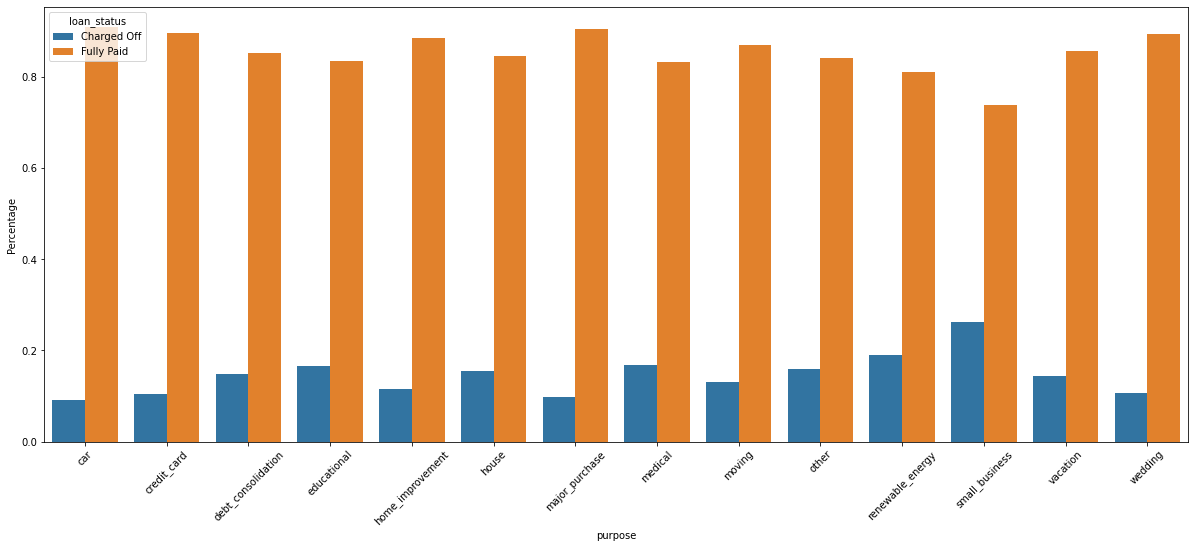

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.barplot(data=purp_df, x="purpose", y='Percentage', hue="loan_status")
plt.xticks(rotation=45)
plt.show()